In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
# Read 'data/What_We_Watched_A_Netflix_Engagement_Report_2023Jan-Jun.xlsx' into a DataFrame: netflix
netflix = pd.read_excel('data/What_We_Watched_A_Netflix_Engagement_Report_2023Jan-Jun.xlsx', header=5, usecols='B:E')
netflix.head()

,Title,Available Globally?,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,2023-03-23,812100000
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000
3,Wednesday: Season 1,Yes,2022-11-23,507700000
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000


In [3]:
netflix.tail()

,Title,Available Globally?,Release Date,Hours Viewed
18209,راس السنة,No,NaT,100000
18210,心が叫びたがってるんだ。,No,NaT,100000
18211,두근두근 내 인생,No,NaT,100000
18212,라디오 스타,No,NaT,100000
18213,선생 김봉두,No,NaT,100000


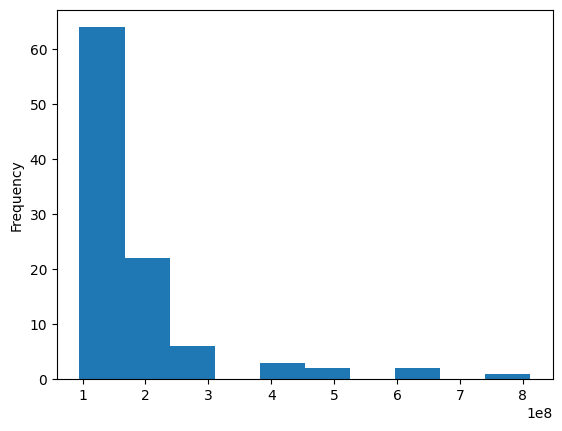

In [4]:
# Create a histogram of the 'Hours Viewed' column
netflix['Hours Viewed'].iloc[:100].plot(kind='hist')

# Show the plot
plt.show()

In [5]:
# Fit the log-normal distribution to the data
shape, loc, scale = stats.lognorm.fit(netflix['Hours Viewed'], floc=0)

# Generate a log-normal distribution with the fitted parameters
fitted_distribution = stats.lognorm(shape, loc, scale)

In [6]:
# Calculate the Sum of Squared Errors (SSE) between the observed data and the fitted distribution
observed_frequencies, bin_edges = np.histogram(netflix['Hours Viewed'], bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
expected_frequencies = fitted_distribution.pdf(bin_centers)

sse = np.sum((observed_frequencies - expected_frequencies) ** 2)

In [7]:
print("The Sum of Squared Errors (SSE) test, when applied to compare the observed Hours Viewed data with a fitted Log-Normal distribution, results in an SSE value of approximately ", sse)

The Sum of Squared Errors (SSE) test, when applied to compare the observed Hours Viewed data with a fitted Log-Normal distribution, results in an SSE value of approximately  9.177635477248848e-16


This very small SSE value suggests a good fit of the Log-Normal distribution to the data.

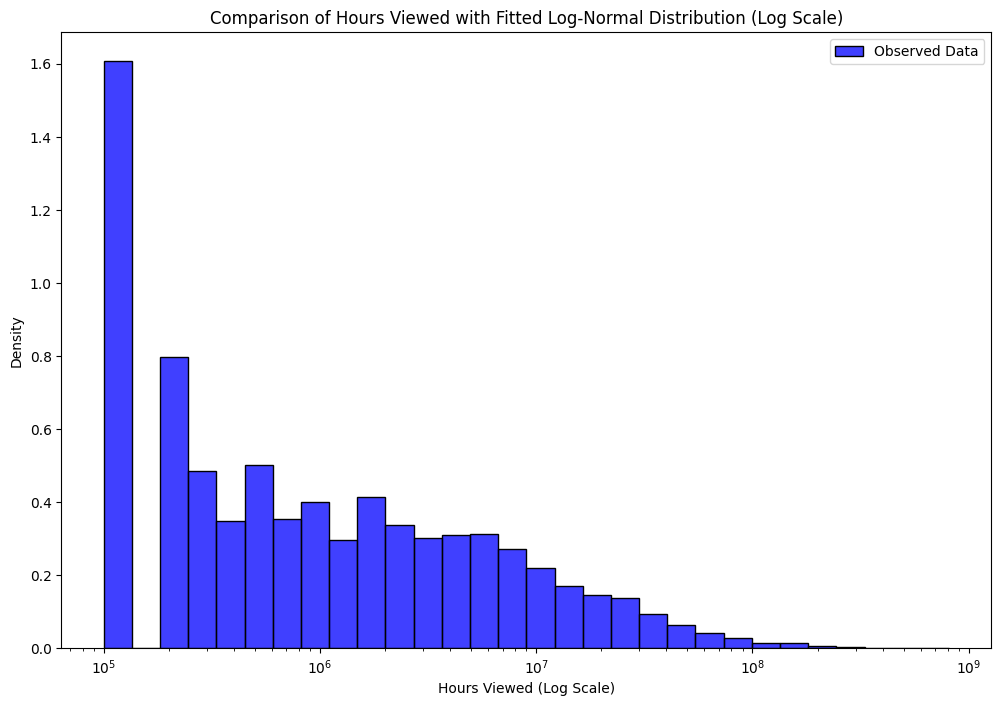

In [8]:
# To improve the visualization, we can use a logarithmic scale for the x-axis
# This will help in better visualizing the distribution of data over a wide range of values

plt.figure(figsize=(12, 8))

# Creating the histogram for the observed data with a log scale
sns.histplot(netflix['Hours Viewed'], bins=30, kde=False, stat="density", color="blue", log_scale=True, label="Observed Data")

# Adding labels, title and setting the x-axis to log scale
plt.xscale('log')
plt.xlabel('Hours Viewed (Log Scale)')
plt.ylabel('Density')
plt.title('Comparison of Hours Viewed with Fitted Log-Normal Distribution (Log Scale)')
plt.legend()

# Show the plot
plt.show()


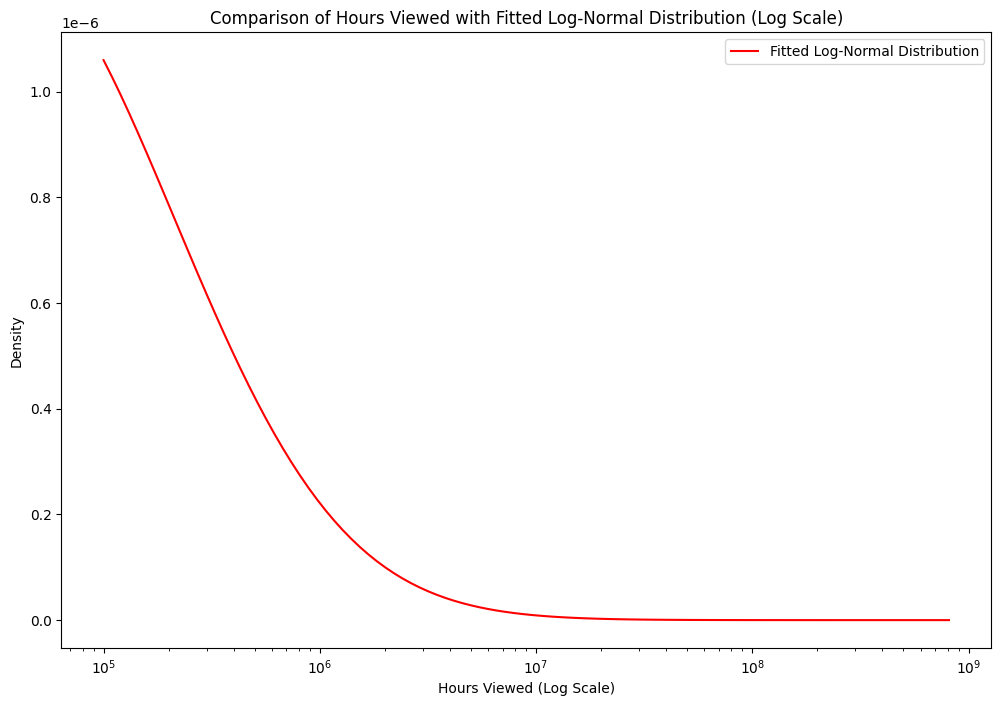

In [9]:
plt.figure(figsize=(12, 8))

# Plotting the fitted Log-Normal distribution on a log scale
log_space = np.logspace(np.log10(min(netflix['Hours Viewed'])), np.log10(max(netflix['Hours Viewed'])), base=10, num=100)
pdf_log = fitted_distribution.pdf(log_space)
plt.plot(log_space, pdf_log, 'r', label="Fitted Log-Normal Distribution")
# Adding labels, title and setting the x-axis to log scale
plt.xscale('log')
plt.xlabel('Hours Viewed (Log Scale)')
plt.ylabel('Density')
plt.title('Comparison of Hours Viewed with Fitted Log-Normal Distribution (Log Scale)')
plt.legend()

# Show the plot
plt.show()


In [10]:
# Calculating the mean of the log-normal distribution using the fitted parameters

# The mean of the log-normal distribution is given by e^(mu_ln + sigma_ln^2 / 2)
# where mu_ln and sigma_ln are the parameters of the underlying normal distribution
# In our case, shape parameter is sigma_ln and scale parameter is e^mu_ln in the log-normal distribution

mu_ln = np.log(scale)  # since scale = e^mu_ln
sigma_ln = shape

mean_log_normal = np.exp(mu_ln + (sigma_ln ** 2) / 2)
mean_log_normal


4473661.235904143

In [11]:
netflix['Hours Viewed'].mean()

5130954.211046448

In [12]:
netflix[netflix['Available Globally?'] == 'No'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13700 entries, 6 to 18213
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                13700 non-null  object        
 1   Available Globally?  13700 non-null  object        
 2   Release Date         940 non-null    datetime64[ns]
 3   Hours Viewed         13700 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 535.2+ KB


In [13]:
hours_viewed_non_global = netflix[netflix['Available Globally?'] == 'No']['Hours Viewed']

# Fit the log-normal distribution to the data
shape, loc, scale = stats.lognorm.fit(hours_viewed_non_global, floc=0)

# Generate a log-normal distribution with the fitted parameters
fitted_distribution = stats.lognorm(shape, loc, scale)

# Calculate the Sum of Squared Errors (SSE) between the observed data and the fitted distribution
observed_frequencies, bin_edges = np.histogram(hours_viewed_non_global, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
expected_frequencies = fitted_distribution.pdf(bin_centers)

sse = np.sum((observed_frequencies - expected_frequencies) ** 2)

print("The Sum of Squared Errors (SSE) test, when applied to compare the observed Hours Viewed data with a fitted Log-Normal distribution, results in an SSE value of approximately ", sse)

The Sum of Squared Errors (SSE) test, when applied to compare the observed Hours Viewed data with a fitted Log-Normal distribution, results in an SSE value of approximately  2.989728706262658e-15


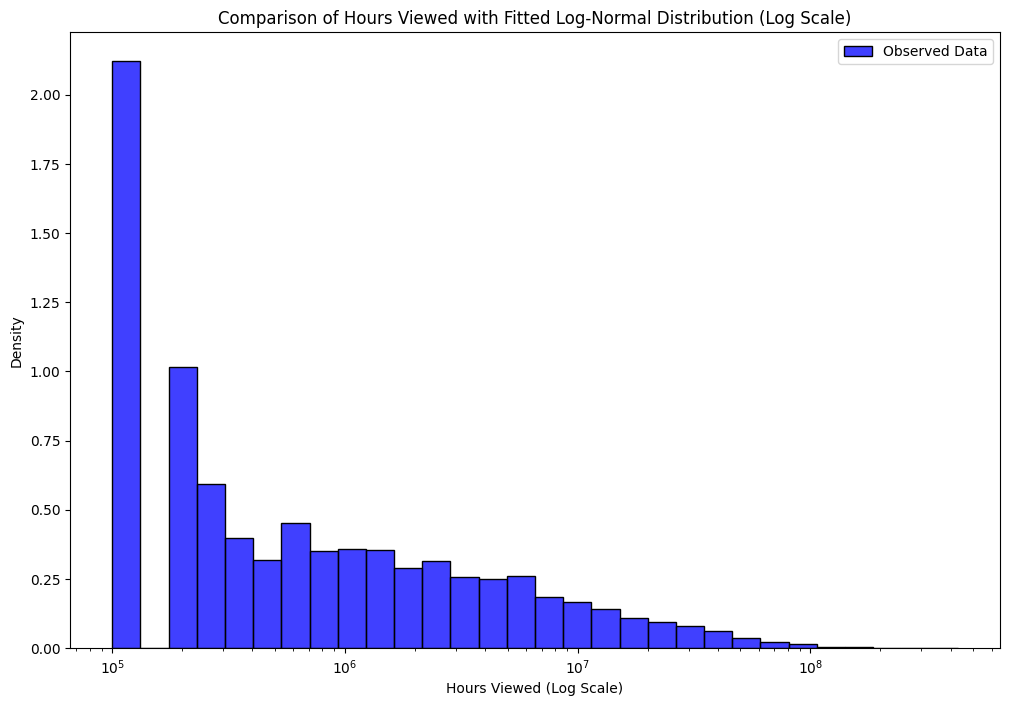

In [14]:
# To improve the visualization, we can use a logarithmic scale for the x-axis
# This will help in better visualizing the distribution of data over a wide range of values

plt.figure(figsize=(12, 8))

# Creating the histogram for the observed data with a log scale
sns.histplot(hours_viewed_non_global, bins=30, kde=False, stat="density", color="blue", log_scale=True, label="Observed Data")

# Adding labels, title and setting the x-axis to log scale
plt.xscale('log')
plt.xlabel('Hours Viewed (Log Scale)')
plt.ylabel('Density')
plt.title('Comparison of Hours Viewed with Fitted Log-Normal Distribution (Log Scale)')
plt.legend()

# Show the plot
plt.show()


In [15]:
# Calculating the mean of the log-normal distribution using the fitted parameters

# The mean of the log-normal distribution is given by e^(mu_ln + sigma_ln^2 / 2)
# where mu_ln and sigma_ln are the parameters of the underlying normal distribution
# In our case, shape parameter is sigma_ln and scale parameter is e^mu_ln in the log-normal distribution

mu_ln = np.log(scale)  # since scale = e^mu_ln
sigma_ln = shape

mean_log_normal = np.exp(mu_ln + (sigma_ln ** 2) / 2)
mean_log_normal

2610237.1573635084

In [16]:
# Read the tab separated file 'data/imdb/title.basics.tsv' into a DataFrame: imdb_title_basics
imdb_title_basics = pd.read_csv('data/imdb/title.basics.tsv', sep='\t')

# Print the first five rows of imdb_title_basics
imdb_title_basics.head()

/var/folders/8y/0ldkfh015gjc7lvpvxd7pr380000gn/T/ipykernel_71767/4015402496.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_title_basics = pd.read_csv('data/imdb/title.basics.tsv', sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [17]:
# Perform an left join on the netflix and imdb_title_basics DataFrames using the netflix 'Title' column and the 'originalTitle' column of imdb_title_basics
netflix_imdb = netflix.merge(imdb_title_basics, left_on='Title', right_on='primaryTitle', how='left')

# Print the first five rows of netflix_imdb
netflix_imdb.head()


,Title,Available Globally?,Release Date,Hours Viewed,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,tt14661396,tvMiniSeries,Queen Charlotte: A Bridgerton Story,Queen Charlotte: A Bridgerton Story,0,2023,2023,347,"Drama,History,Romance"


In [18]:
netflix_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42069 entries, 0 to 42068
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                42069 non-null  object        
 1   Available Globally?  42069 non-null  object        
 2   Release Date         14431 non-null  datetime64[ns]
 3   Hours Viewed         42069 non-null  int64         
 4   tconst               28680 non-null  object        
 5   titleType            28680 non-null  object        
 6   primaryTitle         28680 non-null  object        
 7   originalTitle        28680 non-null  object        
 8   isAdult              28680 non-null  object        
 9   startYear            28680 non-null  object        
 10  endYear              28680 non-null  object        
 11  runtimeMinutes       28680 non-null  object        
 12  genres               28680 non-null  object        
dtypes: datetime64[ns](1), int64(1),

In [19]:
# For the rows where it didn not find a match, the 'tconst' column will have NaN values
# Try to match the rows where 'tconst' is NaN with the 'originalTitle' column of imdb_title_basics
# Perform an left join on the netflix and imdb_title_basics DataFrames using the netflix 'Title' column and the 'originalTitle' column of imdb_title_basics
netflix_imdb = netflix.merge(imdb_title_basics, left_on='Title', right_on='originalTitle', how='left')

# Print the first five rows of netflix_imdb
netflix_imdb.head()

,Title,Available Globally?,Release Date,Hours Viewed,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,tt14661396,tvMiniSeries,Queen Charlotte: A Bridgerton Story,Queen Charlotte: A Bridgerton Story,0,2023,2023,347,"Drama,History,Romance"


In [20]:
netflix_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41660 entries, 0 to 41659
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                41660 non-null  object        
 1   Available Globally?  41660 non-null  object        
 2   Release Date         14133 non-null  datetime64[ns]
 3   Hours Viewed         41660 non-null  int64         
 4   tconst               28376 non-null  object        
 5   titleType            28376 non-null  object        
 6   primaryTitle         28376 non-null  object        
 7   originalTitle        28376 non-null  object        
 8   isAdult              28376 non-null  object        
 9   startYear            28376 non-null  object        
 10  endYear              28376 non-null  object        
 11  runtimeMinutes       28376 non-null  object        
 12  genres               28376 non-null  object        
dtypes: datetime64[ns](1), int64(1),

In [21]:
# The genre column contains a comma separated list of genres
# We will split the genre column into multiple columns, one for each genre
# To do this, we will use the str.split() method on the 'genre' column
# We will also use the expand=True argument to split the column into multiple columns
# We will then use the add_prefix() method to add the prefix 'genre_' to the column names
netflix_imdb = netflix_imdb.join(netflix_imdb['genres'].str.split(',', expand=True).add_prefix('genre_'))

# Print the first five rows of netflix_imdb
netflix_imdb.head()

,Title,Available Globally?,Release Date,Hours Viewed,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre_0,genre_1,genre_2
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,tt14661396,tvMiniSeries,Queen Charlotte: A Bridgerton Story,Queen Charlotte: A Bridgerton Story,0,2023,2023,347,"Drama,History,Romance",Drama,History,Romance


In [22]:
netflix_imdb

,Title,Available Globally?,Release Date,Hours Viewed,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre_0,genre_1,genre_2
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,tt14661396,tvMiniSeries,Queen Charlotte: A Bridgerton Story,Queen Charlotte: A Bridgerton Story,0,2023,2023,347,"Drama,History,Romance",Drama,History,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41655,راس السنة,No,NaT,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41656,心が叫びたがってるんだ。,No,NaT,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41657,두근두근 내 인생,No,NaT,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41658,라디오 스타,No,NaT,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


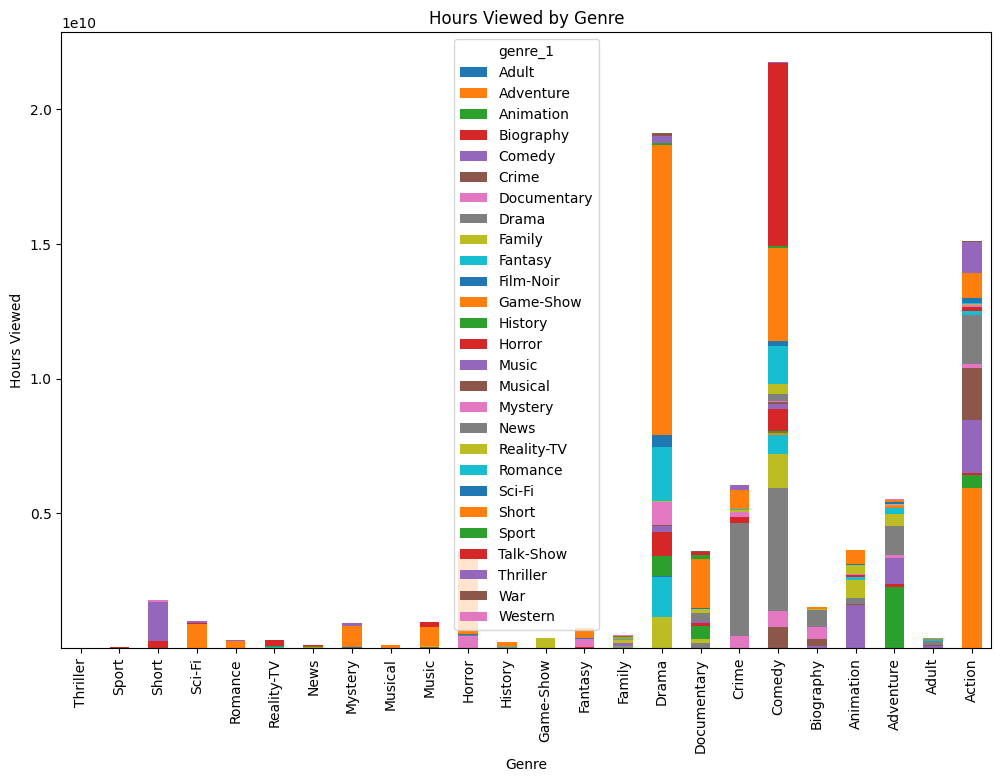

In [23]:
# Create a visualization of the Hours Viewed by 'genre_0' and 'genre_1'. Use a stacked bar chart
# Group the data by 'genre_0' and 'genre_1' and sum the 'Hours Viewed' column
# Use the unstack() method to convert the resulting Series into a DataFrame
# Sort the columns in descending order
# Plot the stacked bar chart
# Add labels and title
# Set the figsize=(12, 8))
# Show the plot

netflix_imdb.groupby(['genre_0', 'genre_1'])['Hours Viewed'].sum().unstack().sort_values(by='genre_0', ascending=False).plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Genre')
plt.ylabel('Hours Viewed')
plt.title('Hours Viewed by Genre')
plt.show()

In [26]:
netflix_imdb.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'genre_0',
       'genre_1', 'genre_2'],
      dtype='object')

In [27]:
netflix_imdb['titleType'].value_counts()

titleType
tvEpisode       14329
movie            5868
short            5784
video             695
tvSeries          627
tvMovie           392
tvSpecial         291
videoGame         215
tvMiniSeries      147
tvShort            28
Name: count, dtype: int64

In [25]:
# Use 'plotly' to create a visualization of the Hours Viewed by 'genre_0' and 'genre_1'. Use a stacked bar chart
# Think of the steps required to create the visualization
# Begin by grouping the data by 'genre_0' and 'genre_1' and sum the 'Hours Viewed' column. 
# Sort the resulting DataFrame by Hours Viewed for 'genre_0' and 'genre_1' in descending order
# Plot the stacked bar chart
# Use 'genre_0' for the x-axis and 'Hours Viewed' for the y-axis
# Use 'genre_1' for the color
# Add labels and title
# Set the figsize=(12, 8))
# Show the plot

import plotly.express as px

# Assuming 'df' is your DataFrame and it has columns 'genre_0', 'genre_1', and 'Hours Viewed'
grouped_df = netflix_imdb.groupby(['genre_0', 'genre_1'])['Hours Viewed'].sum().reset_index()

# Sort the DataFrame
sorted_df = grouped_df.sort_values(by='Hours Viewed', ascending=False)

# Create the plot
fig = px.bar(sorted_df, x='genre_0', y='Hours Viewed', color='genre_1', title='Hours Viewed by Genre',
             labels={'genre_0':'Genre 0', 'Hours Viewed':'Hours Viewed', 'genre_1':'Genre 1'}, 
             height=400, width=800)

# Show the plot
fig.show()

In [28]:
# Use 'plotly' to create a visualization of the Hours Viewed by 'genre_0' and 'genre_1'. Use a stacked bar chart
# Think of the steps required to create the visualization
# Begin by grouping the data by 'genre_0' and 'genre_1' and sum the 'Hours Viewed' column. 
# Sort the resulting DataFrame by Hours Viewed for 'genre_0' and 'genre_1' in descending order
# Plot the stacked bar chart
# Use 'genre_0' for the x-axis and 'Hours Viewed' for the y-axis
# Use 'genre_1' for the color
# Add labels and title
# Set the figsize=(12, 8))
# Show the plot

import plotly.express as px

# Assuming 'df' is your DataFrame and it has columns 'genre_0', 'genre_1', and 'Hours Viewed'
grouped_df = netflix_imdb[netflix_imdb['titleType'] == 'movie'].groupby(['genre_0', 'genre_1'])['Hours Viewed'].sum().reset_index()

# Sort the DataFrame
sorted_df = grouped_df.sort_values(by='Hours Viewed', ascending=False)

# Create the plot
fig = px.bar(sorted_df, x='genre_0', y='Hours Viewed', color='genre_1', title='Hours Viewed by Genre',
             labels={'genre_0':'Genre 0', 'Hours Viewed':'Hours Viewed', 'genre_1':'Genre 1'}, 
             height=400, width=800)

# Show the plot
fig.show()

In [30]:
# Assuming 'df' is your DataFrame and it has columns 'genre_0', 'genre_1', and 'Hours Viewed'
grouped_df = netflix_imdb.loc[
    (netflix_imdb['titleType'] == 'movie') &
    (netflix_imdb['Available Globally?'] == 'No')
    ].groupby(['genre_0', 'genre_1'])['Hours Viewed'].sum().reset_index()

# Sort the DataFrame
sorted_df = grouped_df.sort_values(by='Hours Viewed', ascending=False)

# Create the plot
fig = px.bar(sorted_df, x='genre_0', y='Hours Viewed', color='genre_1', title='Movie Non-Global Hours Viewed by Genre',
             labels={'genre_0':'Genre 0', 'Hours Viewed':'Hours Viewed', 'genre_1':'Genre 1'}, 
             height=400, width=800)

# Show the plot
fig.show()

In [35]:
netflix_imdb.loc[
    (netflix_imdb['titleType'] == 'movie') &
    (netflix_imdb['Available Globally?'] == 'No') &
    (netflix_imdb['genre_0'] == 'Comedy') &
    (netflix_imdb['genre_1'] == 'Drama')
    ].head(50)

,Title,Available Globally?,Release Date,Hours Viewed,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre_0,genre_1,genre_2
500,A Man Called Otto,No,NaT,61300000,tt7405458,movie,A Man Called Otto,A Man Called Otto,0,2022,\N,126,"Comedy,Drama",Comedy,Drama,None
1268,I See You,No,2020-07-09,30000000,tt0857381,movie,I See You,I See You,0,2006,\N,122,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
2555,This Is Where I Leave You,No,NaT,18600000,tt1371150,movie,This Is Where I Leave You,This Is Where I Leave You,0,2014,\N,103,"Comedy,Drama",Comedy,Drama,None
2933,Instant Family,No,NaT,16500000,tt7401588,movie,Instant Family,Instant Family,0,2018,\N,118,"Comedy,Drama",Comedy,Drama,None
3103,Polar,No,2019-01-25,15700000,tt6032076,movie,Polar,Polar,0,2019,\N,81,"Comedy,Drama",Comedy,Drama,None
3240,Devotion,No,2023-01-20,15100000,tt0021798,movie,Devotion,Devotion,0,1931,\N,81,"Comedy,Drama,Romance",Comedy,Drama,Romance
3637,Maid in Manhattan,No,NaT,14100000,tt0252076,movie,Maid in Manhattan,Maid in Manhattan,0,2002,\N,105,"Comedy,Drama,Romance",Comedy,Drama,Romance
3740,The Dilemma,No,NaT,13700000,tt1578275,movie,The Dilemma,The Dilemma,0,2011,\N,111,"Comedy,Drama",Comedy,Drama,None
4179,This Is 40,No,NaT,12500000,tt1758830,movie,This Is 40,This Is 40,0,2012,\N,134,"Comedy,Drama,Romance",Comedy,Drama,Romance
4201,Easy A,No,NaT,12400000,tt1282140,movie,Easy A,Easy A,0,2010,\N,92,"Comedy,Drama,Romance",Comedy,Drama,Romance
